In [62]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [63]:
file = 'C:\\bluetooth\\healthmopupandbaselinenmisfacility.csv'

In [64]:
df = pd.read_csv(file)

In [65]:
df.head(1)

,facility_name,facility_type_display,maternal_health_delivery_services,emergency_transport,skilled_birth_attendant,num_chews_fulltime,phcn_electricity,c_section_yn,child_health_measles_immun_calc,num_nurses_fulltime,...,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,sector,formhub_photo_id,gps,survey_id,unique_lga,latitude,longitude
0,HEALTH POST KAGBANG,Health Post,True,True,False,1.0,True,False,True,0.0,...,True,False,True,health,1393335750723.jpg,6.54340807 9.08470312 218.8000030517578 5.0,451a0efb-5fa6-4bad-93cd-7cf19eb50833,cross_river_obudu,6.543408,9.084703


In [66]:
df.shape

(34139, 30)

In [67]:
df.describe()

,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude
count,33705.000000,31643.000000,33166.00000,31974.000000,34139.000000,34139.000000
mean,2.076814,0.954366,1.00196,0.589260,8.588811,7.239061
std,3.171834,5.505466,5.78344,4.550893,2.414159,2.386462
min,0.000000,0.000000,0.00000,0.000000,4.281809,2.707818
25%,0.000000,0.000000,0.00000,0.000000,6.596869,5.443072
50%,1.000000,0.000000,0.00000,0.000000,8.031827,7.286000
75%,3.000000,1.000000,1.00000,1.000000,10.489125,8.589357
max,80.000000,513.000000,431.00000,378.000000,13.864973,14.636396


<h1>Data cleaning

<h4>Checking for duplicates

In [68]:
duplicates = df[df.duplicated()]
duplicates.head()

,facility_name,facility_type_display,maternal_health_delivery_services,emergency_transport,skilled_birth_attendant,num_chews_fulltime,phcn_electricity,c_section_yn,child_health_measles_immun_calc,num_nurses_fulltime,...,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,sector,formhub_photo_id,gps,survey_id,unique_lga,latitude,longitude
3704,Health clinic Binawa,Basic Health Centre or Primary Health Clinic,True,False,False,2.0,False,False,True,0.0,...,True,True,True,health,1396873515524.jpg,10.086083333333333 8.443876666666666 792.1 5.0,4ee5a9ee-7555-41a5-bb7c-44578cdae759,kaduna_kauru,10.086083,8.443877
4039,Obohia Health Center Ahiazu Mbaise,Primary Health Centre (PHC),True,False,True,3.0,False,False,True,1.0,...,True,False,True,health,1397212478510.jpg,5.559770291661401 7.235506433578447 169.382270...,ea433b45-a161-4795-8820-8388fda507ee,imo_ahiazu_mbaise,5.559770,7.235506
26402,Heath Post,Health Post,True,False,False,0.0,False,False,True,0.0,...,False,False,True,health,1342005894043.jpg,12.19526097 8.17294051 542.5 5.0,48d9740f-0c08-4f10-89ec-c90db173c33d,kano_bagwai,12.195261,8.172941
26405,Badau Dispensary,Health Post,False,False,False,0.0,False,False,True,0.0,...,False,False,True,health,1342014936671.jpg,12.1931429 8.13250442 543.5 5.0,14a9ea13-9c1c-4f40-a6a6-47545cbaaea5,kano_bagwai,12.193143,8.132504
26408,Jarumawa Health Post,Health Post,False,False,False,0.0,False,False,False,0.0,...,True,False,True,health,1342175275058.jpg,12.1078164 8.15521852 536.4000244140625 5.0,23c5b0de-e700-476f-b348-86458ca986eb,kano_bagwai,12.107816,8.155219


In [69]:
duplicates.shape

(17, 30)

<h4>Removing Duplicates

In [70]:
df.drop_duplicates(inplace = True)

<h4>Confirming the shape for the new dataset

In [71]:
df.shape

(34122, 30)

<h4>checking for missing value

In [72]:
missing_value = df.isnull().sum()
missing_value


facility_name                         613
facility_type_display                 115
maternal_health_delivery_services     688
emergency_transport                     0
skilled_birth_attendant               884
num_chews_fulltime                    434
phcn_electricity                     4358
c_section_yn                          561
child_health_measles_immun_calc      4788
num_nurses_fulltime                  2496
num_nursemidwives_fulltime            973
num_doctors_fulltime                 2165
date_of_survey                          0
facility_id                             0
community                             103
ward                                  203
management                           4754
improved_water_supply                4424
improved_sanitation                    68
vaccines_fridge_freezer              4854
antenatal_care_yn                     666
family_planning_yn                    754
malaria_treatment_artemisinin         663
sector                            

In [73]:
df.replace('', np.nan, inplace = True)

In [74]:
df[['facility_name', 'facility_name','unique_lga']].replace(np.nan, 'Others')

,facility_name,facility_name,unique_lga
0,HEALTH POST KAGBANG,HEALTH POST KAGBANG,cross_river_obudu
1,Alhari Clinic,Alhari Clinic,nasarawa_karu
2,Primary health centre umukuru okehi,Primary health centre umukuru okehi,rivers_etche
3,PHC EHOM CENTRAL,PHC EHOM CENTRAL,cross_river_biase
4,Health post,Health post,cross_river_biase
...,...,...,...
34134,Kunle Medical Centre,Kunle Medical Centre,ondo_akure_north
34135,PHC Ediba,PHC Ediba,cross_river_calabar_municipal
34136,UWANI MEDICAL CENTRE,UWANI MEDICAL CENTRE,enugu_enugu_south
34137,Tungar Yawo Dispensary,Tungar Yawo Dispensary,kebbi_fakai


In [75]:
df.dropna(axis = 0, inplace = True)

In [76]:
df.shape

(26221, 30)

<h2>Exploratory Data Analysis</h2>

<h4>Analysing the distribution of different facility types to understand the variety of healthcare infrastructure</h4>

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26221 entries, 0 to 34138
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   facility_name                      26221 non-null  object 
 1   facility_type_display              26221 non-null  object 
 2   maternal_health_delivery_services  26221 non-null  object 
 3   emergency_transport                26221 non-null  bool   
 4   skilled_birth_attendant            26221 non-null  object 
 5   num_chews_fulltime                 26221 non-null  float64
 6   phcn_electricity                   26221 non-null  object 
 7   c_section_yn                       26221 non-null  object 
 8   child_health_measles_immun_calc    26221 non-null  object 
 9   num_nurses_fulltime                26221 non-null  float64
 10  num_nursemidwives_fulltime         26221 non-null  float64
 11  num_doctors_fulltime               26221 non-null  flo

In [78]:
# df['facility_name']=df['facility_name'].astype(str)
# df['facility_type_display']=df['facility_type_display'].astype(str)
# df['community']=df['community'].astype(str)
# df['ward']=df['ward'].astype(str)
# df['unique_lga']=df['unique_lga'].astype(str)
# df['facility_id']=df['facility_id'].astype(str)
# df['management']=df['management'].astype(str)
# df['emergency_transport']=df['emergency_transport'].astype(bool)
# df['skilled_birth_attendant']=df['skilled_birth_attendant'].astype(bool)
# df['phcn_electricity']=df['phcn_electricity'].astype(bool)
# df['child_health_measles_immun_calc']=df['child_health_measles_immun_calc'].astype(bool)
# df['improved_water_supply']=df['improved_water_supply'].astype(bool)
# df['improved_sanitation']=df['improved_sanitation'].astype(bool)
# df['vaccines_fridge_freezer']=df['vaccines_fridge_freezer'].astype(bool)
# df['antenatal_care_yn']=df['antenatal_care_yn'].astype(bool)
# df['family_planning_yn']=df['family_planning_yn'].astype(bool)
# df['malaria_treatment_artemisinin']=df['malaria_treatment_artemisinin'].astype(bool)
# df['num_chews_fulltime']=df['num_chews_fulltime'].astype(int)
# df['phcn_electricity']=df['phcn_electricity'].astype(int)
# df['c_section_yn']=df['c_section_yn'].astype(int)
# df['child_health_measles_immun_calc']=df['child_health_measles_immun_calc'].astype(int)
# df['num_nurses_fulltime']=df['num_nurses_fulltime'].astype(int)
# df['num_nursemidwives_fulltime']=df['num_nursemidwives_fulltime'].astype(int)
# df['num_doctors_fulltime']=df['num_doctors_fulltime'].astype(int)
# df['latitude']=df['latitude'].astype(float)
# df['longitude']=df['longitude'].astype(float)




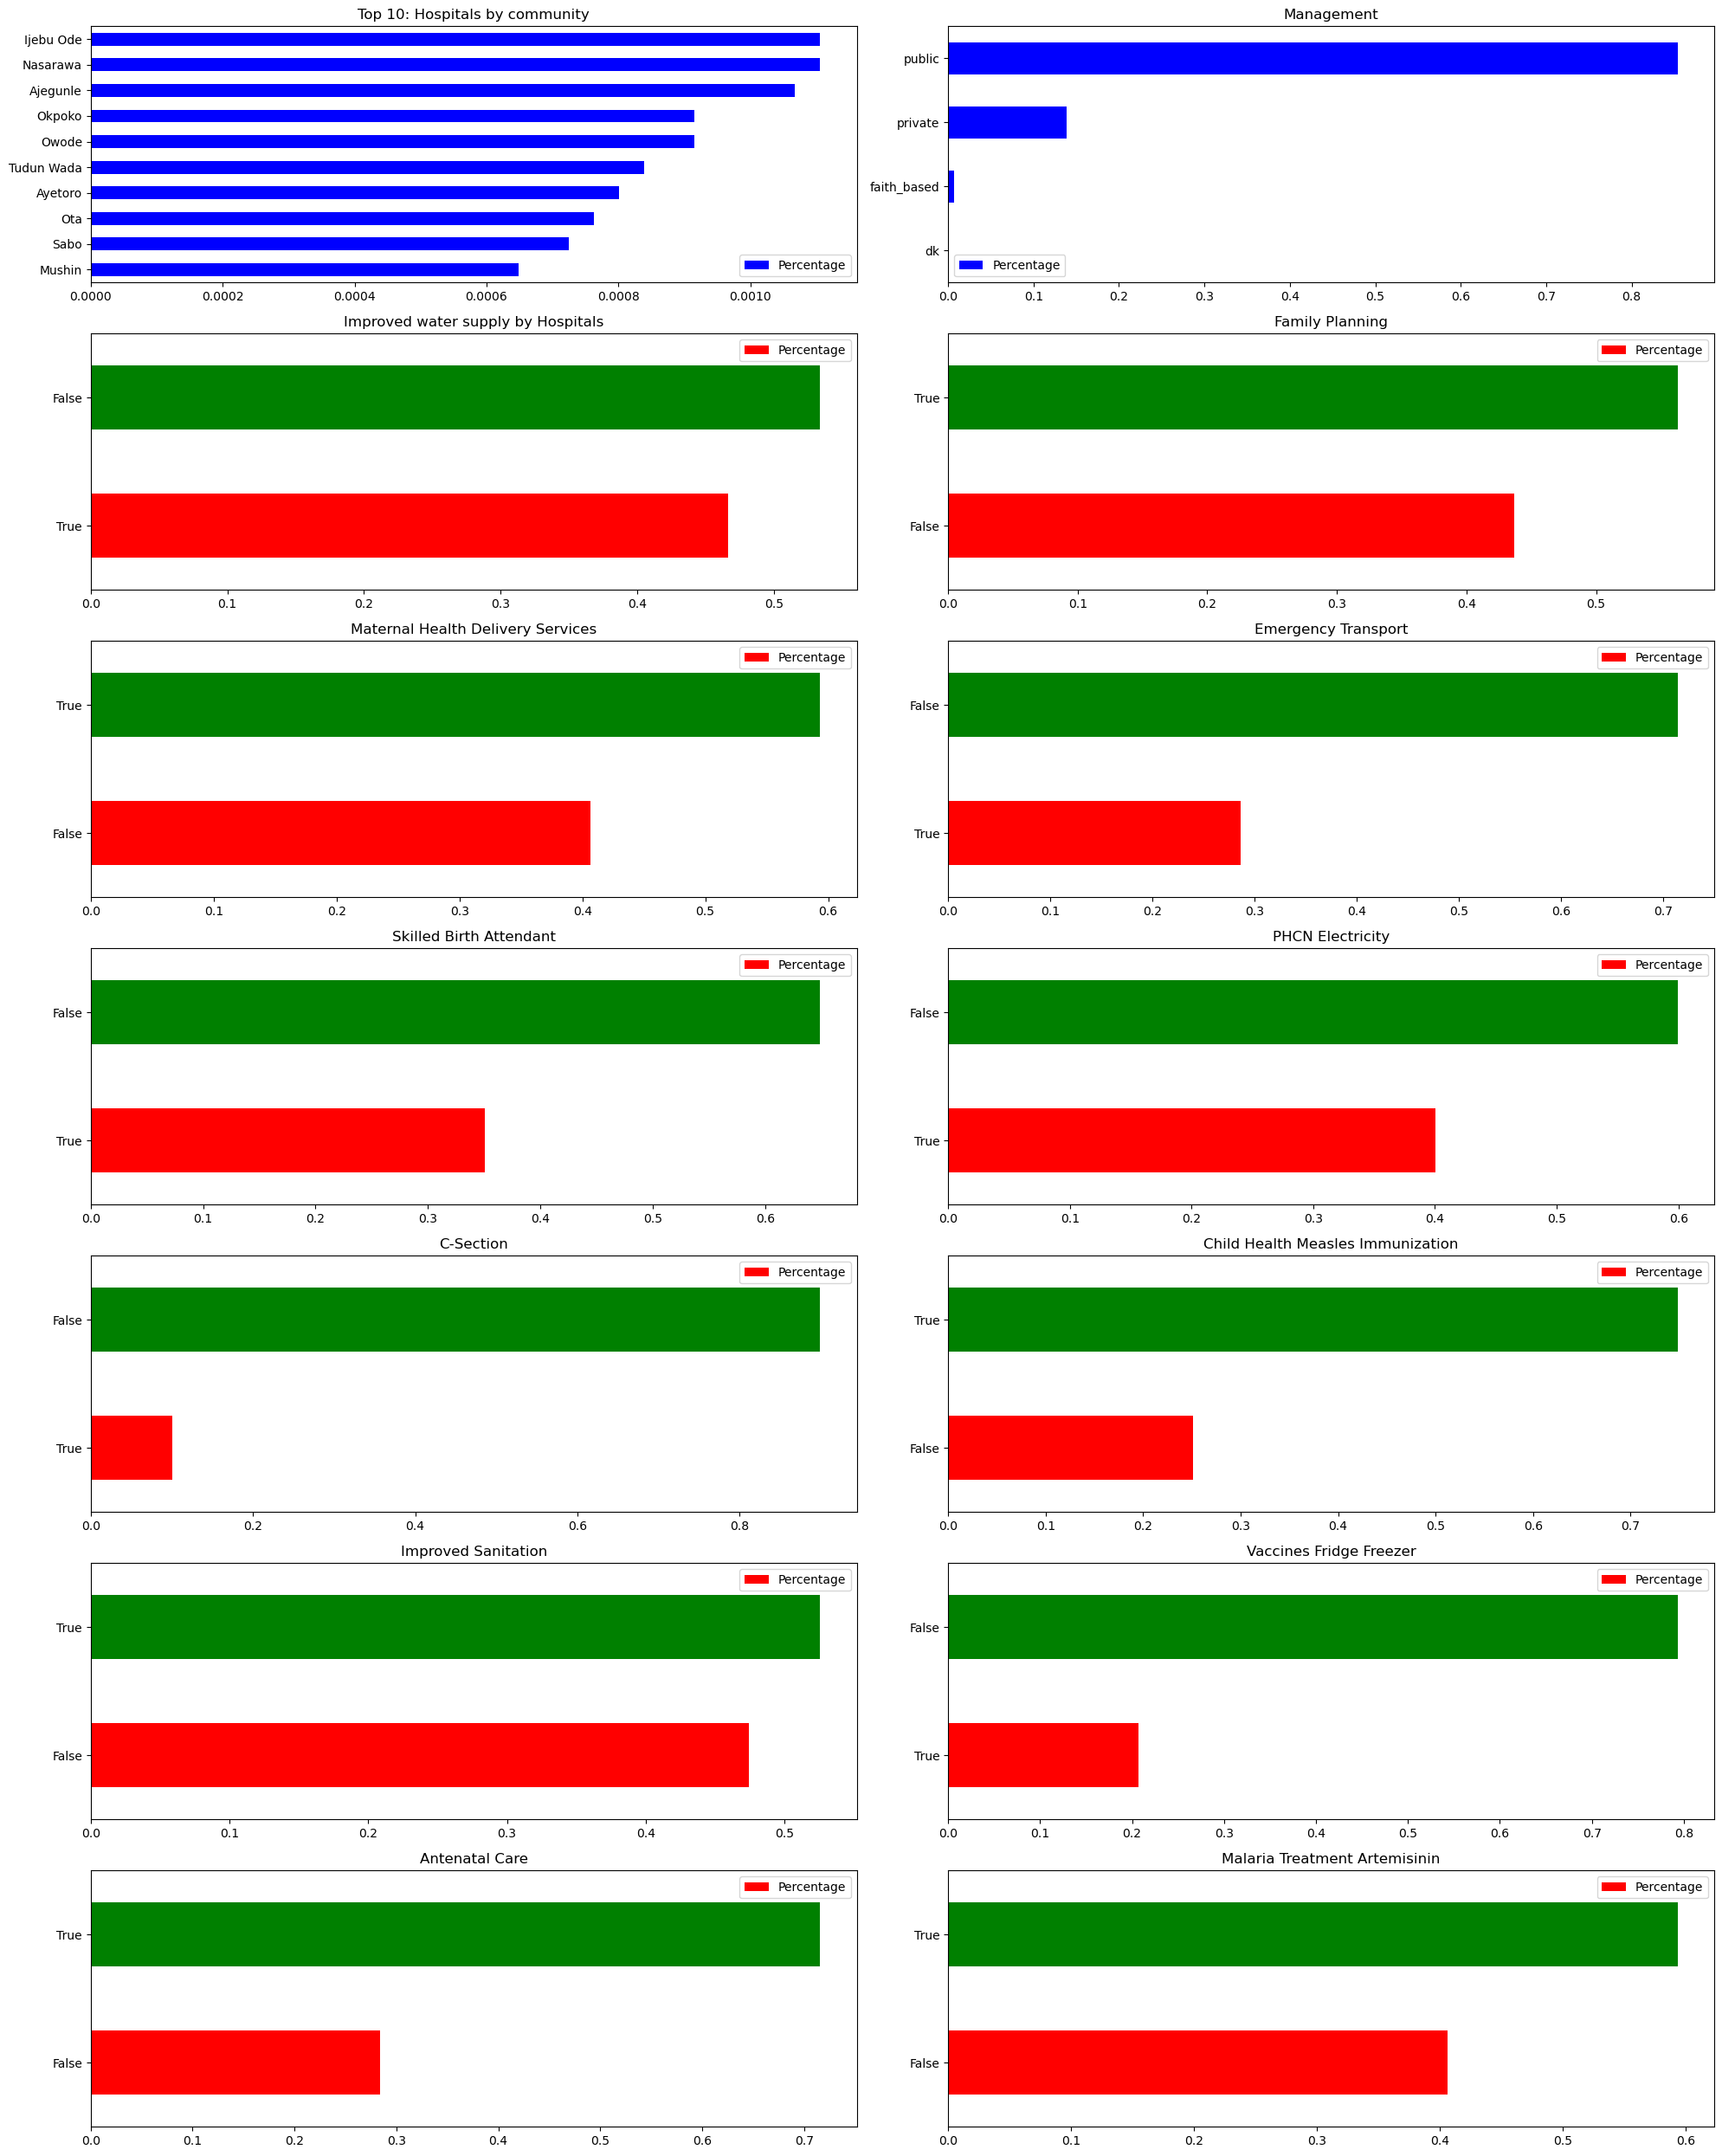

In [79]:
fig, axes = plt.subplots(7, 2, figsize=(20, 25))

# Plot 1:
title = "Top 10: Hospitals by community"
df["community"].value_counts(normalize=True).sort_values()[-10:].\
                            plot(kind="barh", color='blue', ax=axes[0, 0], title=title, label="Percentage")
axes[0, 0].legend()

# Plot 2:
title = "Management"
df["management"].value_counts(normalize=True).sort_values()[-10:].\
                                    plot(kind="barh", color="blue", ax=axes[0, 1], title=title, label="Percentage")
axes[0, 1].legend()

# Plot 3:
title = "Improved water supply by Hospitals"
df["improved_water_supply"].value_counts(normalize=True).sort_values().\
                                    plot(kind="barh", color=['red','green'], ax=axes[1, 0], title=title, label="Percentage")
axes[1, 0].legend()

# Plot 4:
title = "Family Planning"
df["family_planning_yn"].value_counts(normalize=True).sort_values().\
                                    plot(kind="barh", color=['red','green'], ax=axes[1, 1], title=title, label="Percentage")
axes[1, 1].legend()

# Plot 5:
title = "Maternal Health Delivery Services"
df["maternal_health_delivery_services"].value_counts(normalize=True).sort_values().\
                                    plot(kind="barh", color=['red','green'], ax=axes[2, 0], title=title, label="Percentage")
axes[2, 0].legend()

# Plot 6:
title = "Emergency Transport"
df["emergency_transport"].value_counts(normalize=True).sort_values().\
                                    plot(kind="barh", color=['red','green'], ax=axes[2, 1], title=title, label="Percentage")
axes[2, 1].legend()

# Plot 7:
title = "Skilled Birth Attendant"
df["skilled_birth_attendant"].value_counts(normalize=True).sort_values().\
                                    plot(kind="barh", color=['red','green'], ax=axes[3, 0], title=title, label="Percentage")
axes[3, 0].legend()

# Plot 8:
title = "PHCN Electricity"
df["phcn_electricity"].value_counts(normalize=True).sort_values().\
                                    plot(kind="barh", color=['red','green'], ax=axes[3, 1], title=title, label="Percentage")
axes[3, 1].legend()

# Plot 9:
title = "C-Section"
df["c_section_yn"].value_counts(normalize=True).sort_values().\
                                    plot(kind="barh", color=['red','green'], ax=axes[4, 0], title=title, label="Percentage")
axes[4, 0].legend()

# Plot 10:
title = "Child Health Measles Immunization"
df["child_health_measles_immun_calc"].value_counts(normalize=True).sort_values().\
                                    plot(kind="barh", color=['red','green'], ax=axes[4, 1], title=title, label="Percentage")
axes[4, 1].legend()

# Plot 11:
title = "Improved Sanitation"
df["improved_sanitation"].value_counts(normalize=True).sort_values().\
                                    plot(kind="barh", color=['red','green'], ax=axes[5, 0], title=title, label="Percentage")
axes[5, 0].legend()

# Plot 12:
title = "Vaccines Fridge Freezer"
df["vaccines_fridge_freezer"].value_counts(normalize=True).sort_values().\
                                    plot(kind="barh", color=['red','green'], ax=axes[5, 1], title=title, label="Percentage")
axes[5, 1].legend()

# Plot 13:
title = "Antenatal Care"
df["antenatal_care_yn"].value_counts(normalize=True).sort_values().\
                                    plot(kind="barh", color=['red','green'], ax=axes[6, 0], title=title, label="Percentage")
axes[6, 0].legend()

# Plot 14:
title = "Malaria Treatment Artemisinin"
df["maternal_health_delivery_services"].value_counts(normalize=True).sort_values().\
                                    plot(kind="barh", color=['red','green'], ax=axes[6, 1], title=title, label="Percentage")
axes[6, 1].legend()

plt.tight_layout()
plt.show()


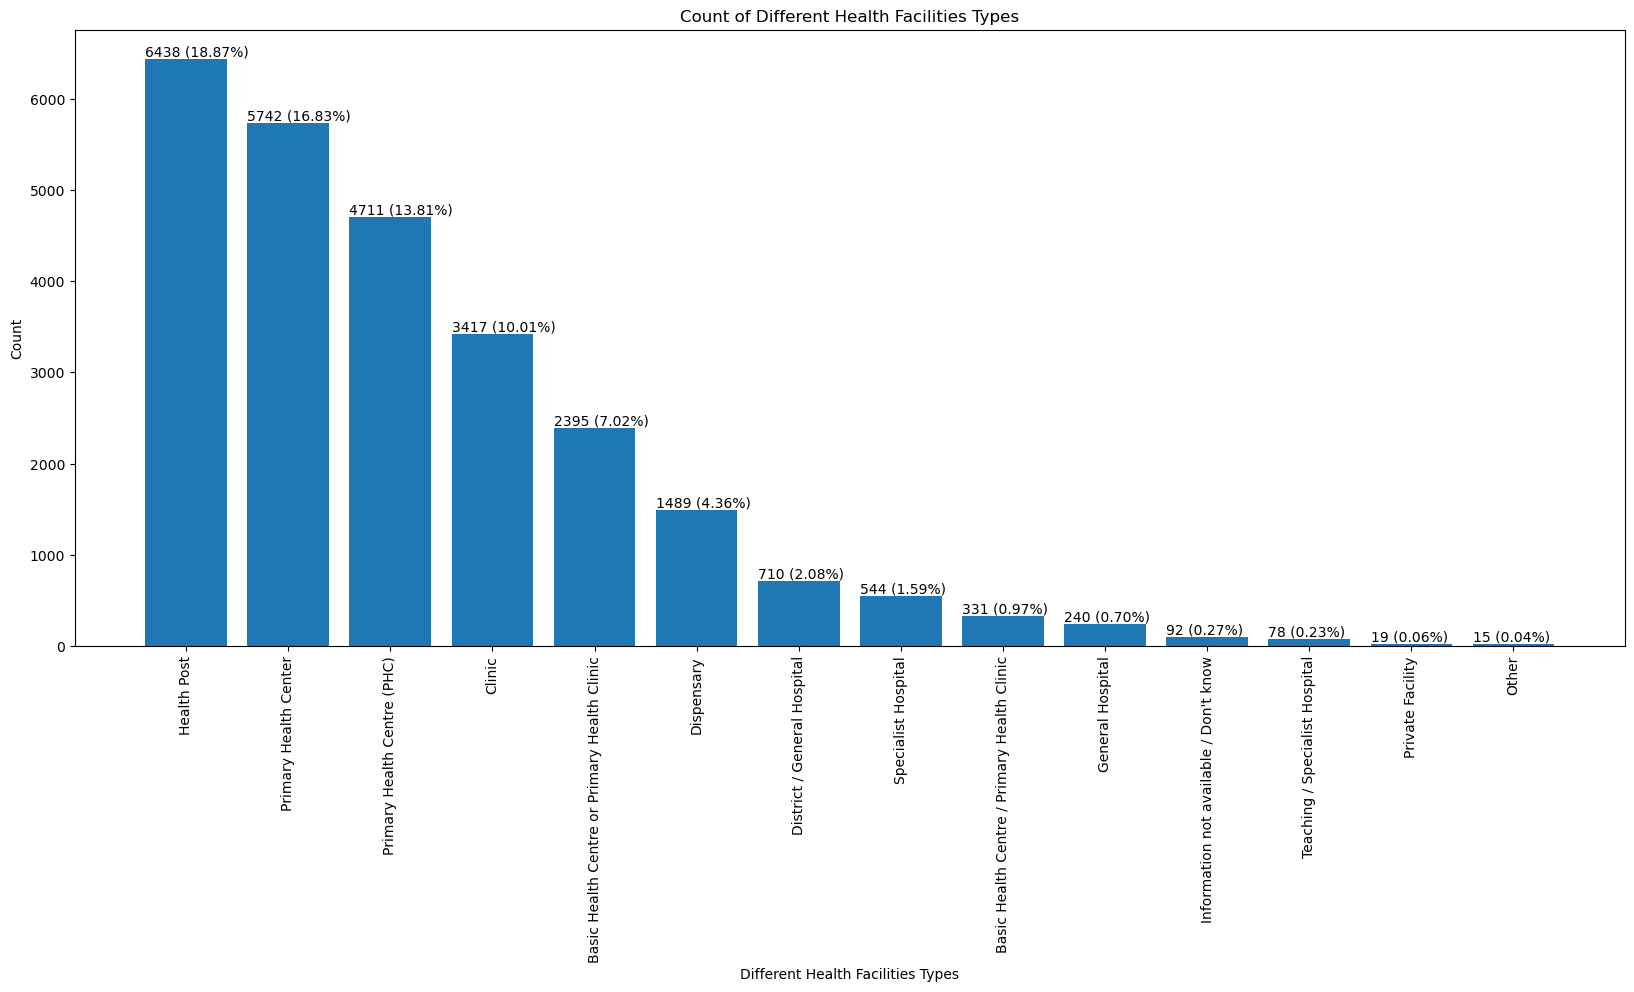

In [80]:
Type_of_health_facility = df['facility_type_display'].value_counts().reset_index()
plt.figure(figsize=(20,8
                    ))
bars = plt.bar(Type_of_health_facility['index'], Type_of_health_facility['facility_type_display'])
plt.xlabel('Different Health Facilities Types')
plt.ylabel('Count')
plt.title('Count of Different Health Facilities Types')
plt.xticks(rotation = 90)
for bar in bars:
    y_value = bar.get_height()
    y_value_p = y_value/34122*100
    plt.text(bar.get_x() , y_value, f'{y_value} ({y_value_p:.2f}%)', va='bottom')

plt.show()

In [81]:
df.columns

Index(['facility_name', 'facility_type_display',
       'maternal_health_delivery_services', 'emergency_transport',
       'skilled_birth_attendant', 'num_chews_fulltime', 'phcn_electricity',
       'c_section_yn', 'child_health_measles_immun_calc',
       'num_nurses_fulltime', 'num_nursemidwives_fulltime',
       'num_doctors_fulltime', 'date_of_survey', 'facility_id', 'community',
       'ward', 'management', 'improved_water_supply', 'improved_sanitation',
       'vaccines_fridge_freezer', 'antenatal_care_yn', 'family_planning_yn',
       'malaria_treatment_artemisinin', 'sector', 'formhub_photo_id', 'gps',
       'survey_id', 'unique_lga', 'latitude', 'longitude'],
      dtype='object')

Rating public, private, and faith_based health centers amongst one another based on their infracstructures

Maternal Health Services in different health centers by management

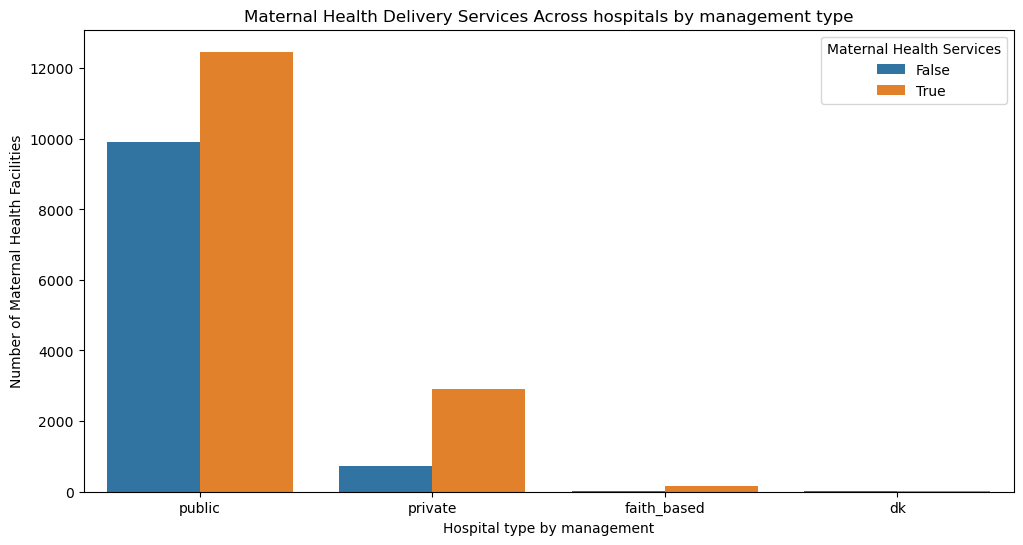

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(x='management', hue='maternal_health_delivery_services', data=df)

plt.xlabel('Hospital type by management')
plt.ylabel('Number of Maternal Health Facilities')
plt.title('Maternal Health Delivery Services Across hospitals by management type')
plt.legend(title='Maternal Health Services', loc='upper right')
plt.xticks(rotation=0) 
plt.show()  

'facility_name', 'facility_type_display',
       'maternal_health_delivery_services', 'emergency_transport',
       'skilled_birth_attendant', 'num_chews_fulltime', 'phcn_electricity',
       'c_section_yn', 'child_health_measles_immun_calc',
       'num_nurses_fulltime', 'num_nursemidwives_fulltime',
       'num_doctors_fulltime', 'date_of_survey', 'facility_id', 'community',
       'ward', 'management', 'improved_water_supply', 'improved_sanitation',
       'vaccines_fridge_freezer', 'antenatal_care_yn', 'family_planning_yn',
       'malaria_treatment_artemisinin', 'sector', 'formhub_photo_id', 'gps',
       'survey_id', 'unique_lga', 'latitude', 'longitude'

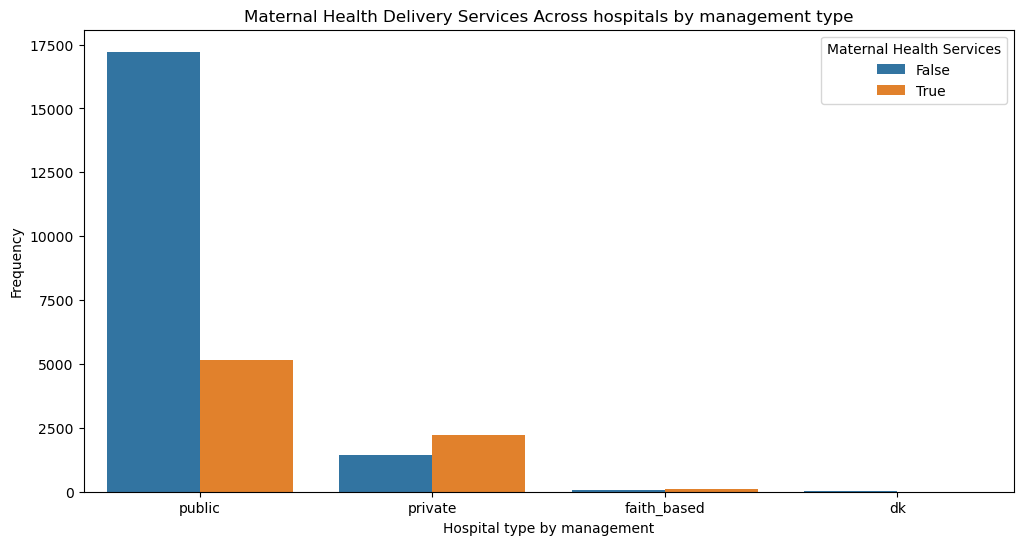

In [83]:
plt.figure(figsize=(12, 6))
sns.countplot(x='management', hue='emergency_transport', data=df)

plt.xlabel('Hospital type by management')
plt.ylabel('Frequency')
plt.title('Maternal Health Delivery Services Across hospitals by management type')
plt.legend(title='Maternal Health Services', loc='upper right')
plt.xticks(rotation=0) 
plt.show()  

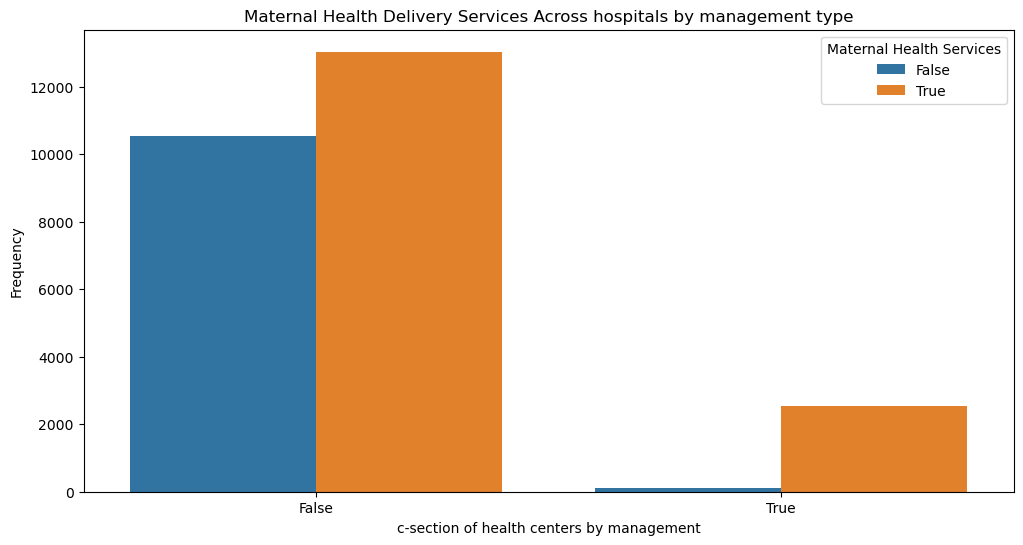

In [84]:
plt.figure(figsize=(12, 6))
sns.countplot(x='c_section_yn', hue='maternal_health_delivery_services', data=df)

plt.xlabel('c-section of health centers by management')
plt.ylabel('Frequency')
plt.title('Maternal Health Delivery Services Across hospitals by management type')
plt.legend(title='Maternal Health Services', loc='upper right')
plt.xticks(rotation=0) 
plt.show()  

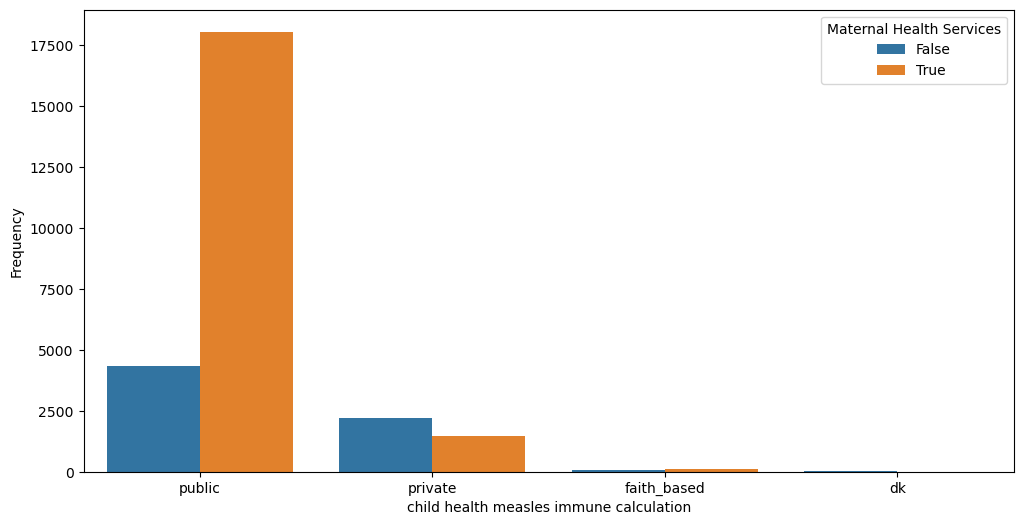

In [85]:
plt.figure(figsize=(12, 6))
sns.countplot(x='management', hue='child_health_measles_immun_calc', data=df)

plt.xlabel('child health measles immune calculation')
plt.ylabel('Frequency')
plt.title('')
plt.legend(title='Maternal Health Services', loc='upper right')
plt.xticks(rotation=0) 
plt.show()  

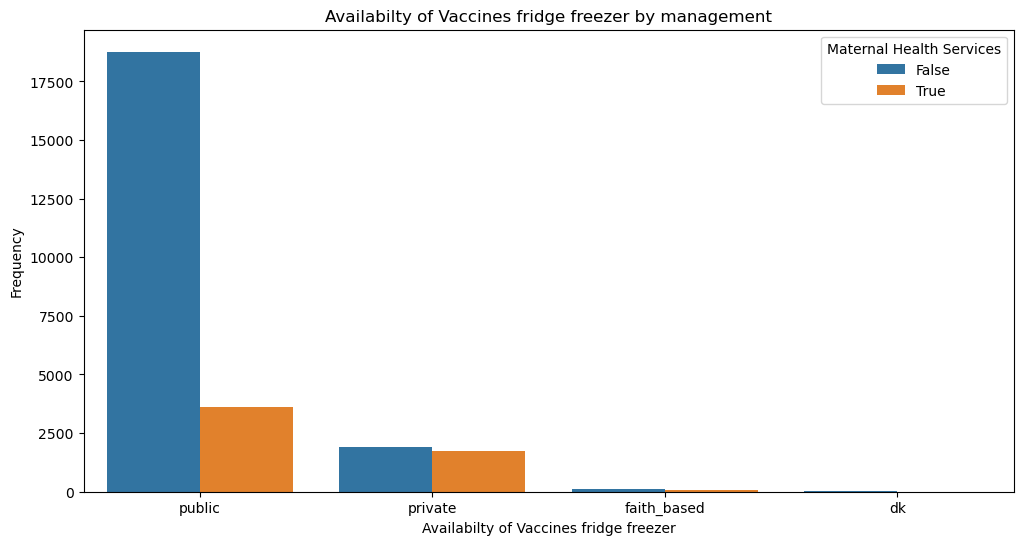

In [86]:
plt.figure(figsize=(12, 6))
sns.countplot(x='management', hue='vaccines_fridge_freezer', data=df)

plt.xlabel('Availabilty of Vaccines fridge freezer')
plt.ylabel('Frequency')
plt.title('Availabilty of Vaccines fridge freezer by management')
plt.legend(title='Maternal Health Services', loc='upper right')
plt.xticks(rotation=0) 
plt.show()  

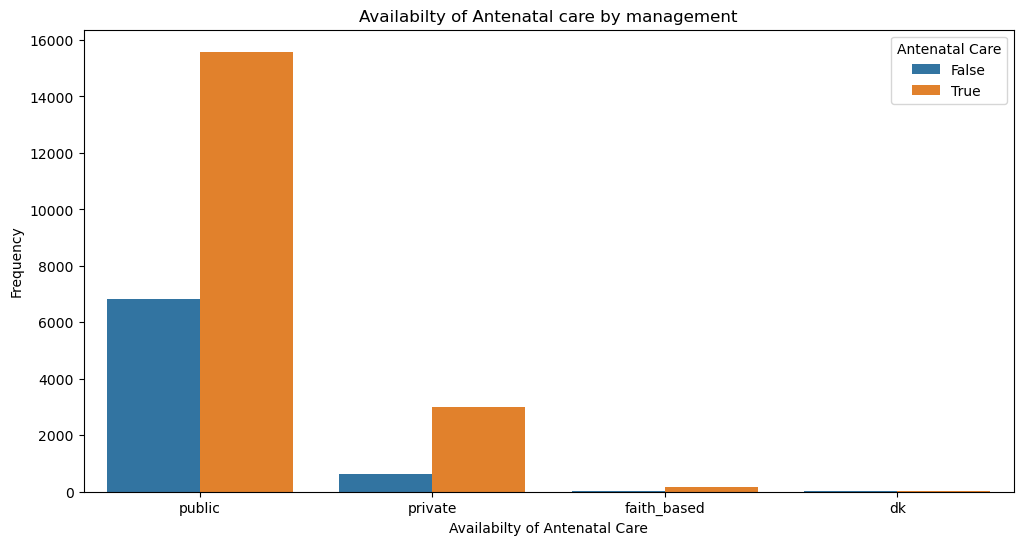

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(x='management', hue='antenatal_care_yn', data=df)

plt.xlabel('Availabilty of Antenatal Care')
plt.ylabel('Frequency')
plt.title('Availabilty of Antenatal care by management')
plt.legend(title='Antenatal Care', loc='upper right')
plt.xticks(rotation=0) 
plt.show()  

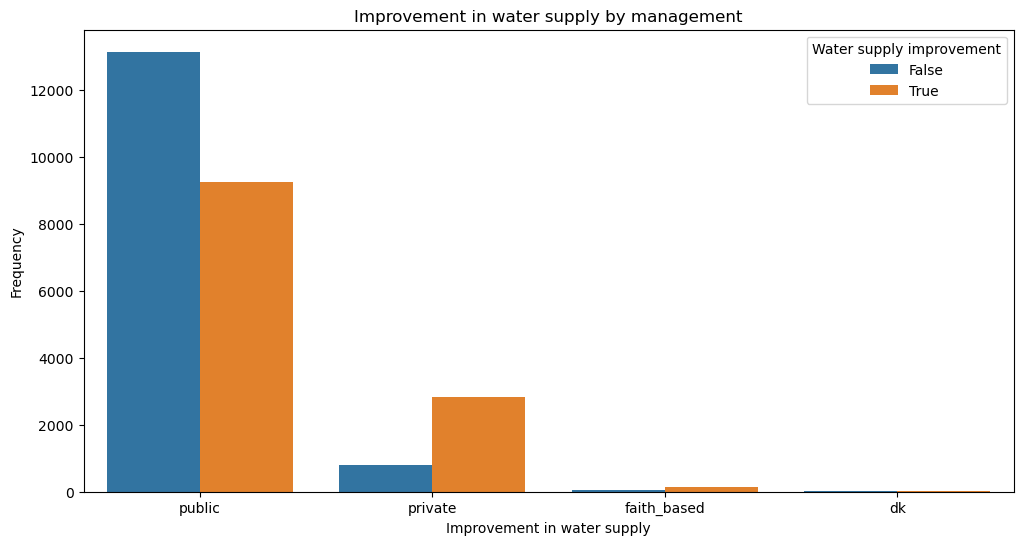

In [88]:
plt.figure(figsize=(12, 6))
sns.countplot(x='management', hue='improved_water_supply', data=df)

plt.xlabel('Improvement in water supply')
plt.ylabel('Frequency')
plt.title('Improvement in water supply by management')
plt.legend(title='Water supply improvement', loc='upper right')
plt.xticks(rotation=0) 
plt.show()  

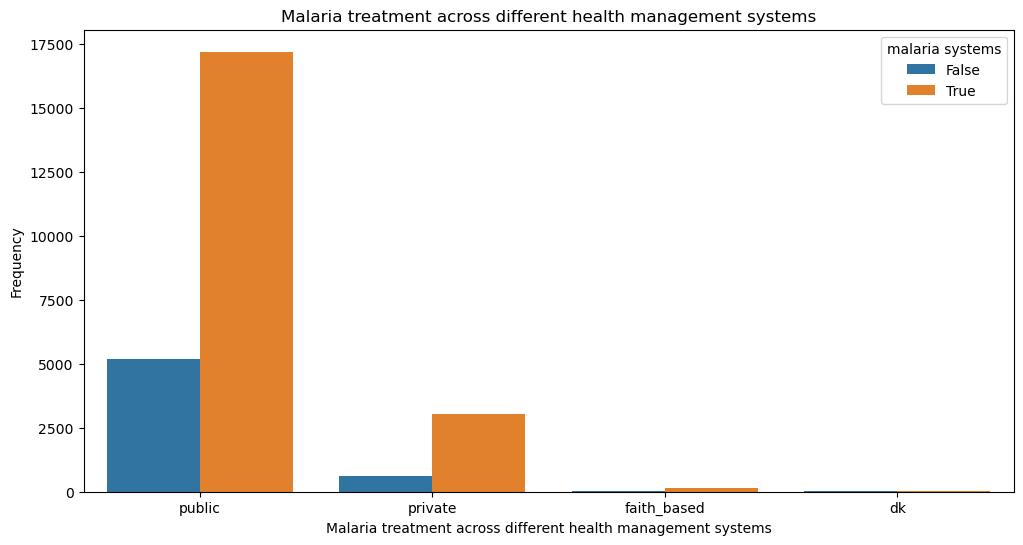

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(x='management', hue='malaria_treatment_artemisinin', data=df)

plt.xlabel('Malaria treatment across different health management systems')
plt.ylabel('Frequency')
plt.title('Malaria treatment across different health management systems')
plt.legend(title='malaria systems', loc='upper right')
plt.xticks(rotation=0) 
plt.show()  

In [90]:
columns_to_sum = ['num_chews_fulltime', 'num_nurses_fulltime', 'num_nursemidwives_fulltime','num_doctors_fulltime', 'c_section_yn']
df['total_staffs']= df[columns_to_sum].sum(axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_12620\3465571211.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[['num_chews_fulltime','num_nurses_fulltime', 'num_nursemidwives_fulltime','num_doctors_fulltime', 'c_section_yn']].corr(), annot = True)


<Axes: >

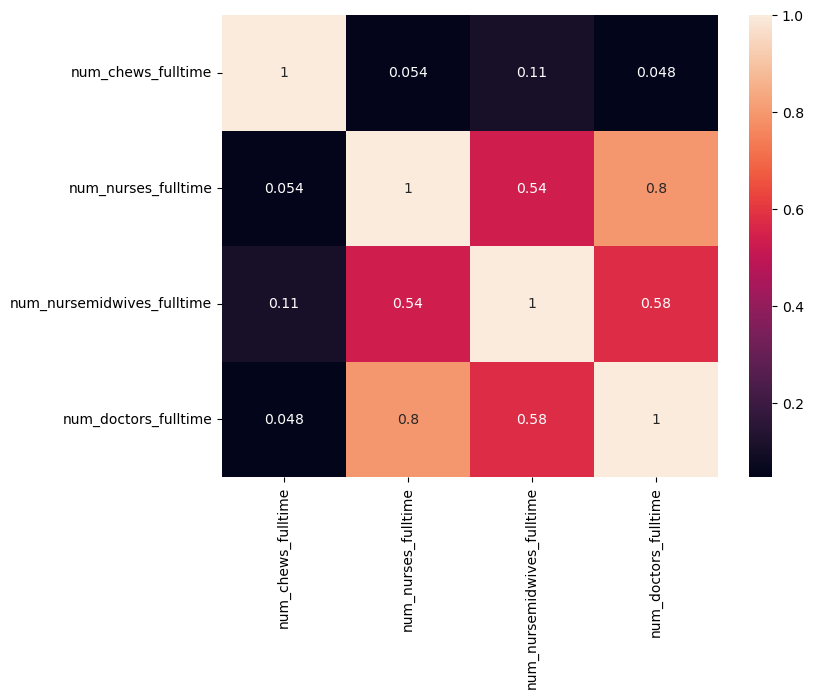

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['num_chews_fulltime','num_nurses_fulltime', 'num_nursemidwives_fulltime','num_doctors_fulltime', 'c_section_yn']].corr(), annot = True)